In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df=pd.read_csv('Live_20210128.csv')

In [55]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [56]:
df=df.drop(df.columns[-4:],axis=1)
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


In [58]:
df.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [59]:
df.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

<AxesSubplot:>

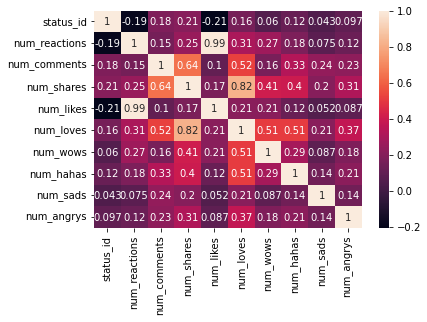

In [61]:
sns.heatmap(df.corr(),annot=True)

In [63]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [71]:
df.dtypes

status_id            int64
status_type         object
status_published    object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
dtype: object

In [74]:
from sklearn.preprocessing import LabelEncoder
def encoder(df):
    le=LabelEncoder()
    col=df['status_type']
    for feature in col:
        try:
            df['status_type']=le.fit_transform(df['status_type'])
        except:
            print('Error encoding'+feature)
    return(df)
encoder(df)
df['status_type'].value_counts()

1    4288
3    2334
2     365
0      63
Name: status_type, dtype: int64

In [79]:
df=df.drop(df.columns[2:3],axis=1)
df.head()

,status_id,status_type,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,3,512,262,432,92,3,1,1,0
1,2,1,0,0,150,0,0,0,0,0
2,3,3,236,57,204,21,1,1,0,0
3,4,1,0,0,111,0,0,0,0,0
4,5,1,0,0,204,9,0,0,0,0


In [80]:
df.dtypes

status_id       int64
status_type     int64
num_comments    int64
num_shares      int64
num_likes       int64
num_loves       int64
num_wows        int64
num_hahas       int64
num_sads        int64
num_angrys      int64
dtype: object

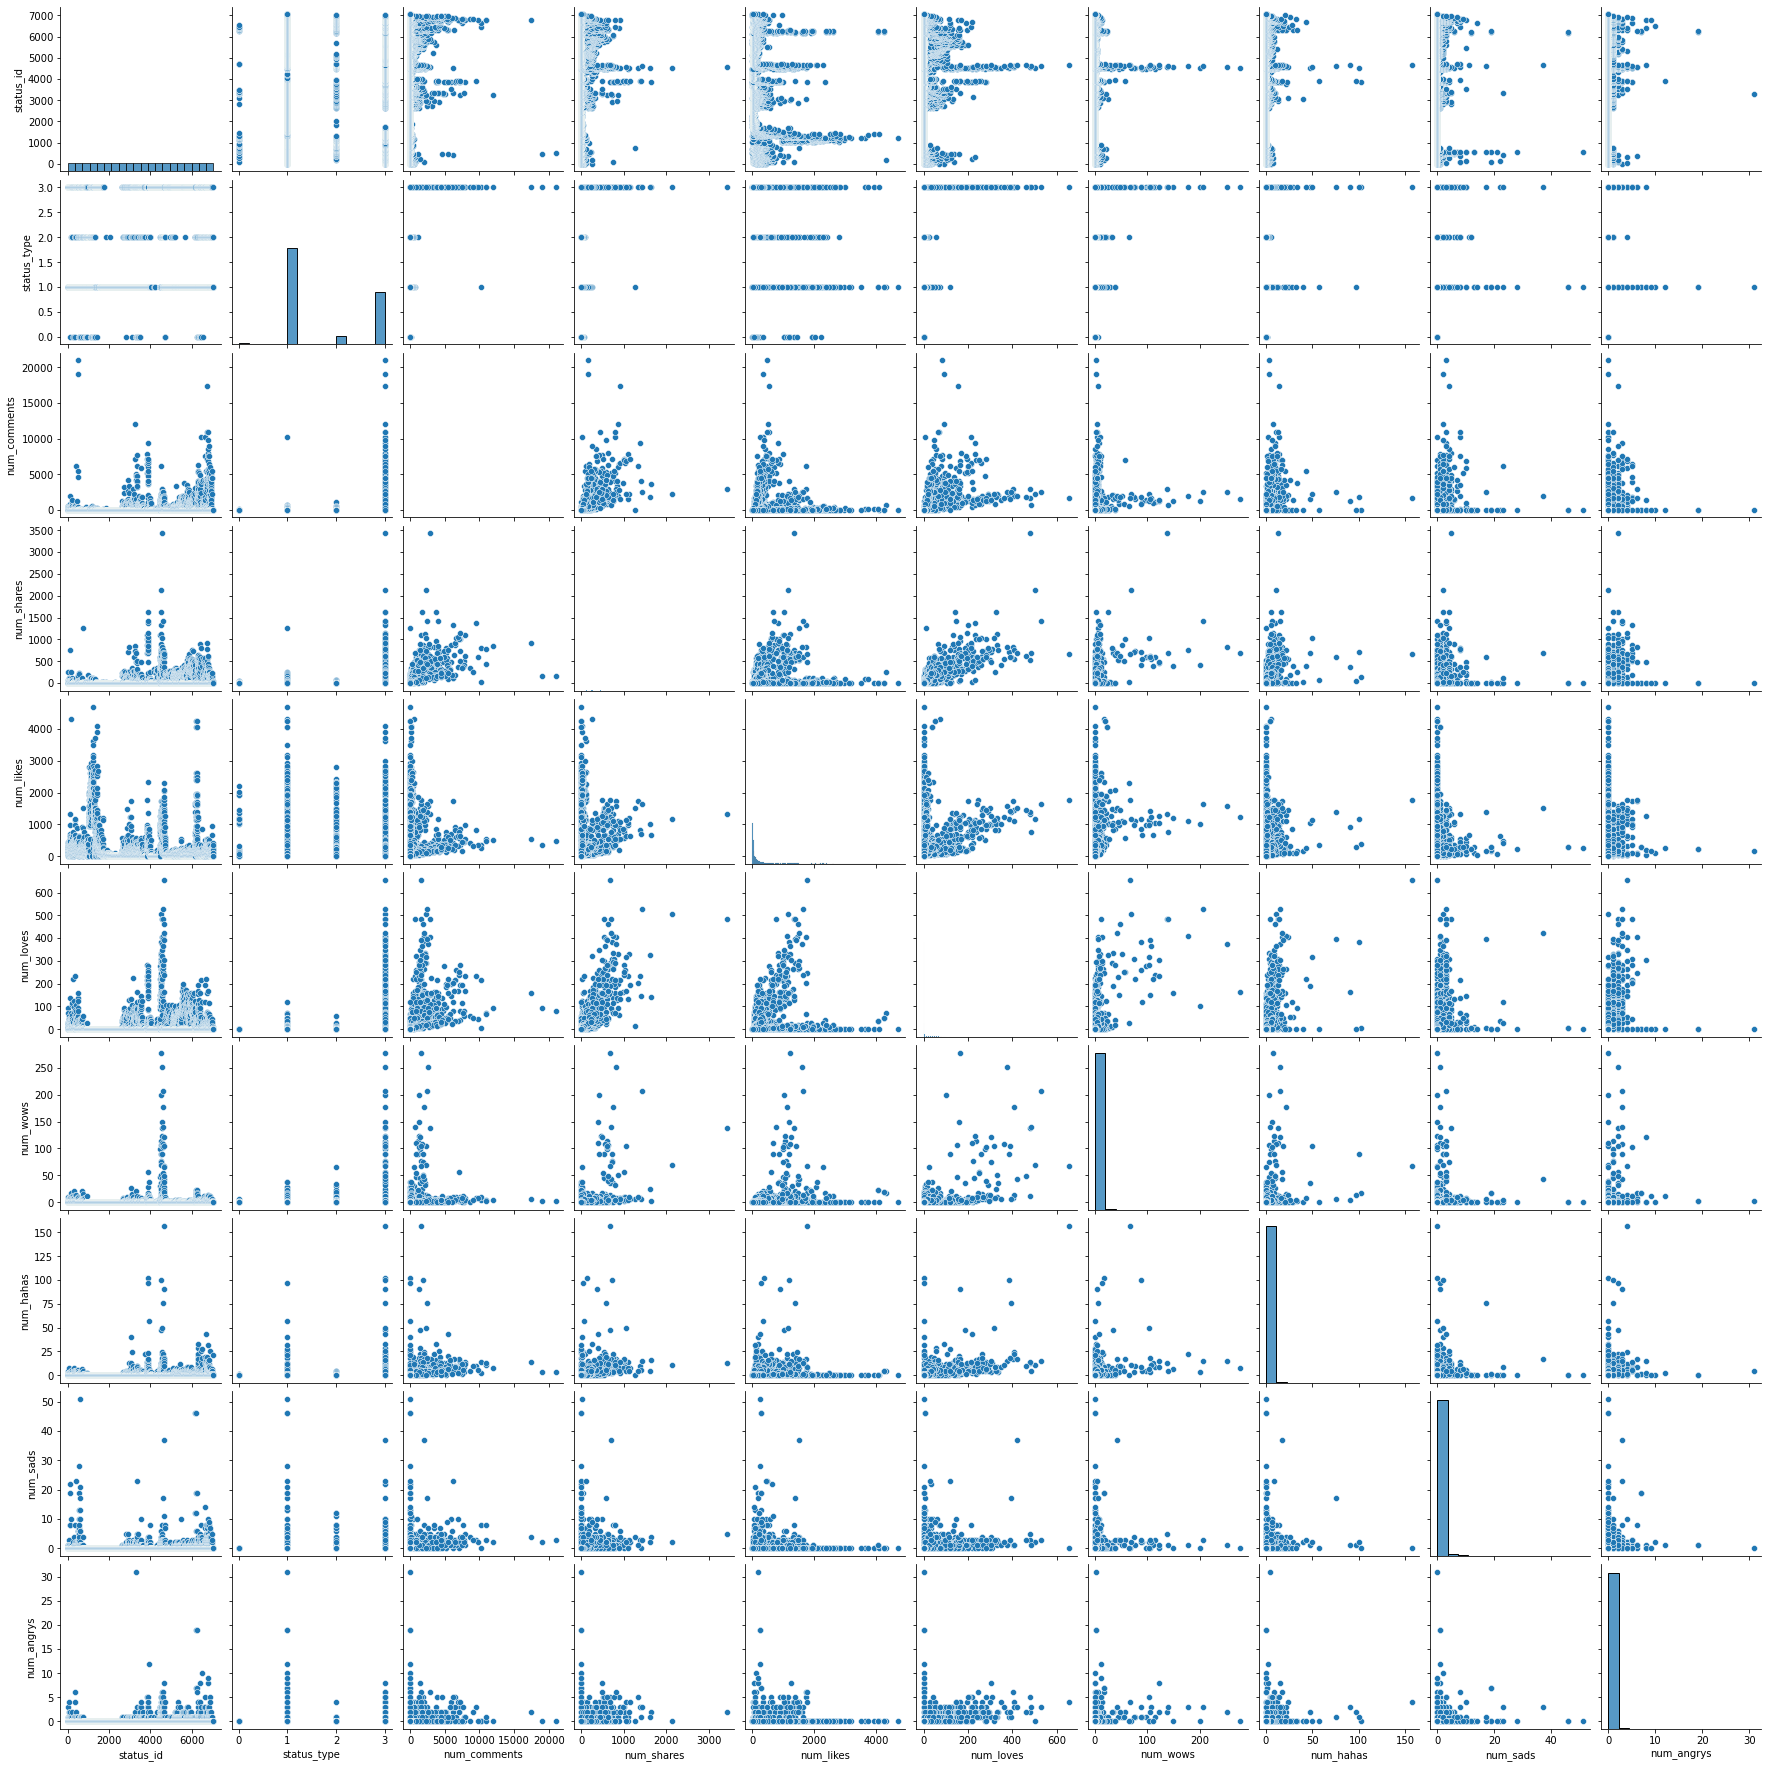

In [85]:
sns.pairplot(df)

In [86]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [87]:
mm.fit_transform(df)

array([[0.00000000e+00, 1.00000000e+00, 2.43925679e-02, ...,
        6.36942675e-03, 1.96078431e-02, 0.00000000e+00],
       [1.41864094e-04, 3.33333333e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.83728188e-04, 1.00000000e+00, 1.12434493e-02, ...,
        6.36942675e-03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99716272e-01, 3.33333333e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99858136e-01, 3.33333333e-01, 5.71700810e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.33333333e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [93]:
x=df.iloc[:, [0, 1, 2, 3]].values
x

array([[   1,    3,  512,  262],
       [   2,    1,    0,    0],
       [   3,    3,  236,   57],
       ...,
       [7048,    1,    0,    0],
       [7049,    1,   12,   22],
       [7050,    1,    0,    0]])

In [94]:
from sklearn.cluster import KMeans
km=KMeans()

In [97]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=200,n_init=10)
    km.fit(x)
    wcss.append(km.inertia_)

In [98]:
wcss

[34901259812.609146,
 12838873690.126469,
 8797319608.457504,
 5567632908.201794,
 4167584140.6215935,
 3476535157.025329,
 2832532342.173289,
 2423635373.5207443,
 2074812865.7182674,
 1802121448.6495564]

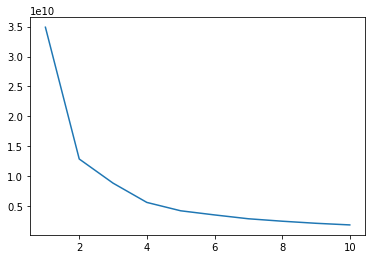

In [100]:
plt.plot(range(1,11),wcss)

In [123]:
km=KMeans(n_clusters=i,init='k-means++',max_iter=200,n_init=10)
ykm=km.fit_predict(x)

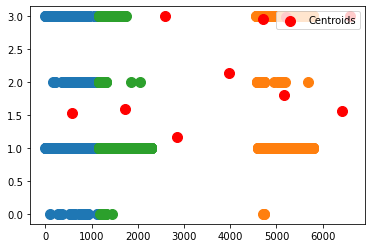

In [124]:
plt.scatter(x[ykm==0,0],x[ykm==0,1],s=100)
plt.scatter(x[ykm==1,0],x[ykm==1,1],s=100)
plt.scatter(x[ykm==2,0],x[ykm==2,1],s=100)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend(loc='upper right')